In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../kofio_dataset/coffee_food_pairing.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Coffee origin  83 non-null     object
 1   Food           83 non-null     object
 2   Flavor type    83 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [15]:
n_origins = df['Coffee origin'].nunique()
n_foods = df['Food'].nunique()
n_flavors = df['Flavor type'].nunique()

print(f"Total number of origins: {n_origins}")
print(f"Total number of foods: {n_foods}")
print(f"Total number of flavor types: {n_flavors}")

Total number of origins: 25
Total number of foods: 23
Total number of flavor types: 9


In [14]:
grouped = df.groupby('Coffee origin')
# Group by “Coffee origin” and display the unique food and flavor type
food_grouped = df.groupby('Coffee origin')['Food'].unique()
flavor_grouped = df.groupby('Coffee origin')['Flavor type'].unique()

for origin, foods in food_grouped.items():
    print(f"{origin}: {', '.join(foods)}")
    print(f"{', '.join(flavor_grouped[origin])}\n")

# Group by "Flavor type" and display the unique origin and food
origin_grouped = df.groupby('Flavor type')['Coffee origin'].unique()
food_grouped = df.groupby('Flavor type')['Food'].unique()

for flavor, origins in origin_grouped.items():
    print(f"{flavor}: {', '.join(origins)}\n")
    print(f"{', '.join(food_grouped[flavor])}\n")


Arabica: chocolate mousse, doughuts
chocolate, sweet

Brazil: Fruit Tart, chocolate, dark  chocolate, wheat bread, doughuts
fruity, chocolate, neutral, sweet

Columbia: chocolate, milk chocolate, white chocolate, wheat bread, sweet bread, doughuts, chocolate crepes
chocolate, neutral, sweet

Costa Rica: Fruit Tart, white chocolate, wheat bread, sweet bread, spicy food, doughuts, American-Style Savory Breakfast
fruity, chocolate, neutral, sweet, spicy, savory

El Salvador: chocolate, doughuts
chocolate, sweet

Ethiopia: Most Berries, milk chocolate, doughuts
fruity, chocolate, sweet

Guatemala: chocolate, chocolate cakes, wheat bread, caramel-based cakes, doughuts
chocolate, neutral, sweer, sweet

Haiti: Peaches, Plums,Apricots, fruit scones, doughuts, fruity crepes
fruity, sweet

Honduras: spicy food, doughuts
spicy, sweet

India: cheese,butter,cream, meat, doughuts
dairy, meat, sweet

Indonesia: caramel-based cakes, doughuts, Omelets
sweer, sweet, savory

Jamaica: Bueberries, doughuts

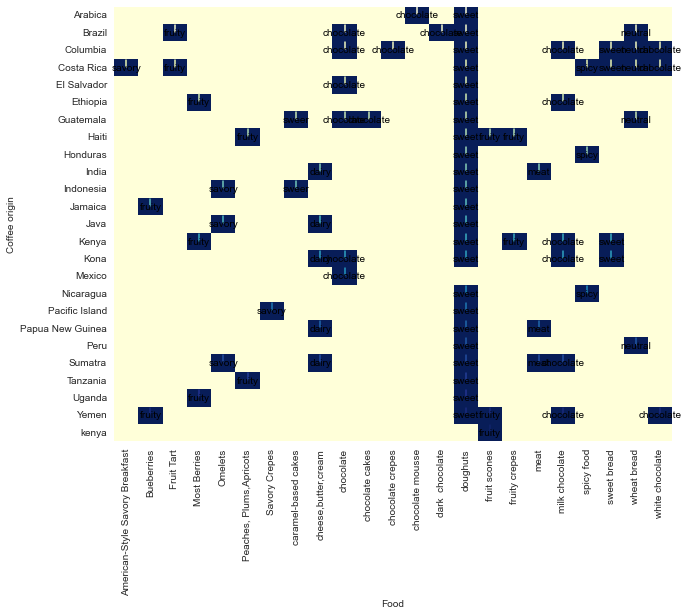

In [17]:
pivot = pd.pivot_table(df, values='Flavor type', index='Coffee origin', columns='Food', aggfunc='first')

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivot.notnull(), cbar=False, ax=ax, cmap='YlGnBu')
for i, origin in enumerate(pivot.index):
    for j, food in enumerate(pivot.columns):
        if pd.notnull(pivot.loc[origin, food]):
            color = plt.cm.YlGnBu(i / len(pivot.index))
            ax.text(j + 0.5, i + 0.5, pivot.loc[origin, food], color='black', ha='center', va='center')
            ax.plot([j + 0.5, j + 0.5], [i + 0.05, i + 0.45], color=color)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()